In [2]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib
import pandas as pd 
import seaborn as sns
import os as os
import sys
import warnings
import time

In [3]:
sns.set(style='white', context='notebook', palette='deep')
np.random.seed(2)
from IPython.display import Image
from matplotlib.colors import ListedColormap
from sklearn import preprocessing, decomposition, tree,metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from astropy.table import Table, Column
from sklearn.preprocessing import LabelEncoder
import itertools

In [3]:
#%pwd
train=pd.read_csv(r"C:\Users\USER\ML\train.csv")
print(train.shape)
test=pd.read_csv(r"C:\Users\USER\ML\test.csv")
print(test.shape)


(42000, 785)
(28000, 784)


C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


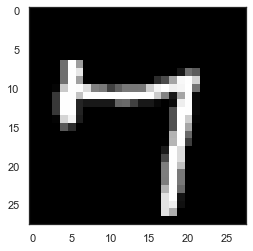

Actual Digit : 7


In [4]:
l=train["label"]
d=train.drop("label",axis=1)

plt.figure(figsize=(4,4))
index=120
griddata=d.iloc[index].as_matrix().reshape(28,28)
plt.imshow(griddata,cmap='gray')
plt.show()

#actual digit

print("Actual Digit :",l[index])

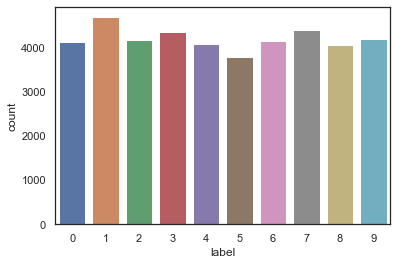

In [5]:
sns.countplot(train['label'])

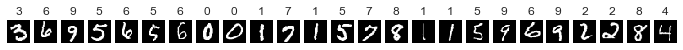

In [6]:

y = train.label.values
X = train.drop("label",axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
fig1, ax1 = plt.subplots(1,25, figsize=(12,8))
for i in range(25):
    ax1[i].imshow(X_test[i].reshape((28,28)), cmap="gray")
    ax1[i].axis('off')
    ax1[i].set_title(y_test[i])

In [7]:
#converting label float values to string vlues
DEBUG=False

train['label'] = train['label'].astype(str)
if DEBUG:
    print(train['label'].describe())    
   

In [8]:
features_train =train.iloc[:,1:]
target_train = train.iloc[:,0]

features_test = test.iloc[:,0:]

#Normalization.now all my flattend 784 values will be in range 0 to 1.
features_train = features_train/255.0
features_test = features_test/255.0

In [9]:
#KNN ALGORITHM 

start_time = time.perf_counter()
train_results = []
test_results = []
# search for an optimal value of k for KNN MOdel
k_range = list(range(1,5))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1, algorithm='auto', leaf_size=40, weights='uniform')
    scores = cross_val_score(knn, features_train, target_train, cv=10, scoring='accuracy', n_jobs=-1)
    k_scores.append(scores.mean())
if DEBUG:
    print(k_scores) 
print(time.perf_counter() - start_time, "seconds")       

3584.125671815 seconds


In [ ]:
if DEBUG:
    scores = pd.DataFrame(k_scores)
    print(scores)

In [10]:
plt.plot(k_range, k_scores)
plt.xlabel('K Value for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN Model for Accuracy')

NameError: name 'k_range' is not defined

In [11]:
#I set my K to be 3
start_time = time.perf_counter()

clf_knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1, algorithm='ball_tree', weights='distance')
#print(clf_knn)
clf_knn = clf_knn.fit(features_train, target_train)
target_predicted_knn = clf_knn.predict(features_test)

scores_knn = cross_val_score(clf_knn, features_train, target_train, cv=10, scoring='accuracy', n_jobs=-1)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_knn.mean(), scores_knn.std() * 2))


print(time.perf_counter() - start_time, "seconds")

Accuracy: 0.97 (+/- 0.01)
1546.741326696 seconds


In [9]:
start_time = time.perf_counter()


clf_knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1, algorithm='kd_tree', leaf_size=40, weights='distance')
#print(clf_knn)
clf_knn = clf_knn.fit(features_train, target_train)
target_predicted_knn = clf_knn.predict(features_test)

scores_knn = cross_val_score(clf_knn, features_train, target_train, cv=10, scoring='accuracy', n_jobs=-1)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_knn.mean(), scores_knn.std() * 2))


print(time.perf_counter() - start_time, "seconds")

Accuracy: 0.97 (+/- 0.01)
2008.285329821 seconds


In [11]:
start_time = time.perf_counter()
clf_knn = KNeighborsClassifier(n_neighbors=3,n_jobs=-1,  algorithm='brute', weights='distance')

#print(clf_knn)

clf_knn = clf_knn.fit(features_train, target_train)

target_predicted_knn = clf_knn.predict(features_test)

scores_knn = cross_val_score(clf_knn, features_train, target_train, cv=10, scoring='accuracy', n_jobs=-1)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_knn.mean(), scores_knn.std() * 2))
print(time.perf_counter() - start_time, "seconds")

Accuracy: 0.97 (+/- 0.01)
321.1756658289996 seconds


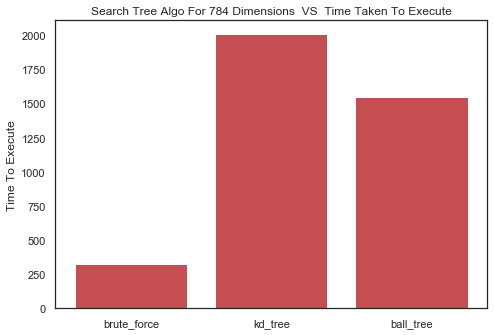

In [10]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Algo = ['brute_force', 'kd_tree', 'ball_tree']
Times = [321.17,2008.2,1546.74]
ax.bar(Algo,Times,color="r")
plt.ylabel('Time To Execute')
plt.title('Search Tree Algo For 784 Dimensions  VS  Time Taken To Execute')
plt.show()

**Fruits Dataset which has 3 feactures & 1 Target column. Low dimension Data

In [4]:
fruits=pd.read_table(r"C:\Users\USER\Desktop\ML Project\fruits.txt")
print(fruits.head())
print(fruits.shape)


   fruit_label fruit_name fruit_subtype  mass  width  height  color_score
0            1      apple  granny_smith   192    8.4     7.3         0.55
1            1      apple  granny_smith   180    8.0     6.8         0.59
2            1      apple  granny_smith   176    7.4     7.2         0.60
3            2   mandarin      mandarin    86    6.2     4.7         0.80
4            2   mandarin      mandarin    84    6.0     4.6         0.79
(59, 7)


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X=fruits[['mass','width','height']]
Y=fruits['fruit_label']
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=0)

start_time = time.perf_counter()
knn=KNeighborsClassifier(n_neighbors=4,n_jobs=-1,  algorithm='brute', weights='distance')
knn.fit(x_train,y_train)
print("Accuracy: ",knn.score(x_test,y_test)*100)
print(time.perf_counter() - start_time, "seconds")

Accuracy:  73.33333333333333
0.11016689200005203 seconds


In [35]:
start_time = time.perf_counter()
knn=KNeighborsClassifier(n_neighbors=4,n_jobs=1,  algorithm='kd_tree', weights='distance')
knn.fit(x_train,y_train)
print("Accuracy: ",knn.score(x_test,y_test)*100)
print(time.perf_counter() - start_time, "seconds")

Accuracy:  73.33333333333333
0.007805774000189558 seconds


In [36]:
start_time = time.perf_counter()
knn=KNeighborsClassifier(n_neighbors=4,n_jobs=1,  algorithm='ball_tree', weights='distance')
knn.fit(x_train,y_train)
print("Accuracy: ",knn.score(x_test,y_test)*100)
print(time.perf_counter() - start_time, "seconds")

Accuracy:  73.33333333333333
0.009809959000449453 seconds


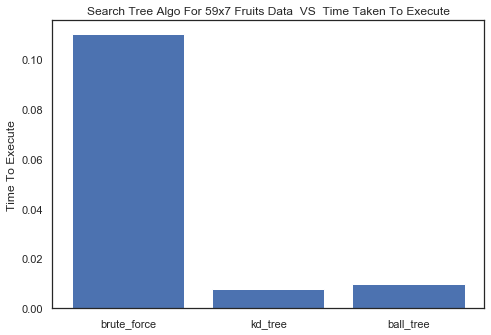

In [5]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Algo = ['brute_force', 'kd_tree', 'ball_tree']
Times = [0.11016689200005203,0.007805774000189558,0.009809959000449453]
ax.bar(Algo,Times)
plt.ylabel('Time To Execute')
plt.title('Search Tree Algo For 59x7 Fruits Data  VS  Time Taken To Execute')
plt.show()

In [58]:
Diabetes=pd.read_csv(r"C:\Users\USER\Desktop\ML Project\datasets_228_482_diabetes.csv")
print(Diabetes.head())
print(Diabetes.shape)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
(768, 9)


In [43]:

X=Diabetes.drop('Outcome',axis=1).values
Y=Diabetes["Outcome"].values
trainx,testx,trainy,testy=train_test_split(X,Y,random_state=0)


In [62]:

start_time = time.perf_counter()
knn=KNeighborsClassifier(n_neighbors=7,n_jobs=-1,  algorithm='brute', weights='distance')
knn.fit(trainx,trainy)
print("Accuracy: ",knn.score(testx,testy)*100)
brute_time=print(time.perf_counter() - start_time, "seconds")

Accuracy:  76.04166666666666
0.1096947829992132 seconds


In [63]:

start_time = time.perf_counter()
knn=KNeighborsClassifier(n_neighbors=7,n_jobs=1,  algorithm='kd_tree', weights='distance')
knn.fit(trainx,trainy)
print("Accuracy: ",knn.score(testx,testy)*100)
kd_tree_time=print(time.perf_counter() - start_time, "seconds")

Accuracy:  76.04166666666666
0.007204802999694948 seconds


In [64]:
start_time = time.perf_counter()
knn=KNeighborsClassifier(n_neighbors=7,n_jobs=1,  algorithm='ball_tree', weights='distance')
knn.fit(trainx,trainy)
print("Accuracy: ",knn.score(testx,testy)*100)
ball_tree_time=print(time.perf_counter() - start_time, "seconds")

Accuracy:  76.04166666666666
0.007813185999111738 seconds


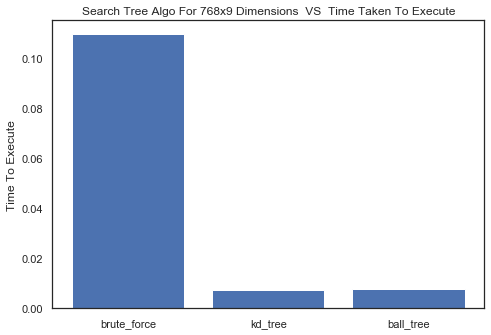

In [6]:


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Algo = ['brute_force', 'kd_tree', 'ball_tree']
Times = [0.1096947829992132,0.007204802999694948,0.007813185999111738]
ax.bar(Algo,Times)
plt.ylabel('Time To Execute')
plt.title('Search Tree Algo For 768x9 Dimensions  VS  Time Taken To Execute')
plt.show()


**MULTI LAYER PERCEPTRON (MLP) ON MNIST DATASET

In [97]:
start_time = time.perf_counter()
from sklearn.neural_network import MLPClassifier

clf_mlp = MLPClassifier(hidden_layer_sizes=(784,), warm_start=True)

#print(clf_mlp)

clf_mlp = clf_mlp.fit(features_train, target_train)

target_predicted_mlp = clf_mlp.predict(features_test)
print(time.perf_counter() - start_time, "seconds")

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(784,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=True)
758.2949768389808 seconds


In [98]:
start_time = time.perf_counter()

scores_mlp = cross_val_score(clf_mlp, features_train, target_train, cv=10, n_jobs=-1, scoring='accuracy')
print("Cross Validation Score for MLP",scores_mlp)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_mlp.mean(), scores_mlp.std() * 2))

print(time.perf_counter() - start_time, "seconds")

Cross Validation Score for MLP [0.98216833 0.97811608 0.97263208 0.9802428  0.98       0.97642296
 0.97785187 0.98332142 0.98307912 0.97831268]
Accuracy: 0.98 (+/- 0.01)
5786.38867431198 seconds


**Convolutional Neural Network(CNN) Model ON MNIST DATASET

In [93]:
import tensorflow as tf 
import tensorflow.keras 
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Sequential,Model
import time

X_train = features_train.values.reshape(-1,28,28,1)
test = features_test.values.reshape(-1,28,28,1)

Y_train = to_categorical(target_train, num_classes = 10)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=0)

#g = plt.imshow(X_train[10][:,:,0])

model = Sequential()

model.add(Conv2D (32 ,(5,5), padding = 'same', strides=1, activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(32,(5,5), padding = 'same', activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
 
model.add(Conv2D(filters = 64, kernel_size = (3,3), strides=2, padding = 'same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
              
model.add(Dropout(rate = 0.5))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

optimizer = tensorflow.keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)


start_time = time.perf_counter()
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])
start_time = time.perf_counter()
history = model.fit(X_train,Y_train, epochs=5, batch_size=86, validation_data=(X_val,Y_val), verbose=1)
_, acc = model.evaluate(X_val,Y_val, verbose=0)

print('Accuracy on test data is: > %.3f' % (acc * 100.0))
             

print(time.perf_counter() - start_time, "seconds")              

Train on 37800 samples, validate on 4200 samples
Epoch 1/5
37800/37800 [==============================] - 388s 10ms/sample - loss: 0.3640 - accuracy: 0.8945 - val_loss: 0.1386 - val_accuracy: 0.9571
Epoch 2/5
37800/37800 [==============================] - 400s 11ms/sample - loss: 0.1140 - accuracy: 0.9658 - val_loss: 0.0534 - val_accuracy: 0.9826
Epoch 3/5
37800/37800 [==============================] - 396s 10ms/sample - loss: 0.0890 - accuracy: 0.9734 - val_loss: 0.0477 - val_accuracy: 0.9860
Epoch 4/5
37800/37800 [==============================] - 398s 11ms/sample - loss: 0.0701 - accuracy: 0.9793 - val_loss: 0.0428 - val_accuracy: 0.9876
Epoch 5/5
37800/37800 [==============================] - 393s 10ms/sample - loss: 0.0637 - accuracy: 0.9816 - val_loss: 0.0507 - val_accuracy: 0.9845
Accuracy on test data is: > 98.452
1984.9328806090016 seconds


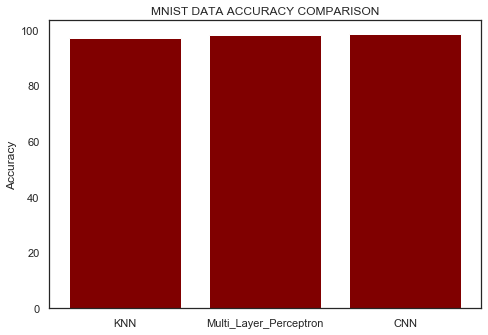

In [8]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Algo = ['KNN', 'Multi_Layer_Perceptron', 'CNN']
ACC = [97,98,98.452]
ax.bar(Algo,ACC,color ='maroon')
plt.ylabel('Accuracy')
plt.title('MNIST DATA ACCURACY COMPARISON')
plt.show()